In [186]:

import matplotlib.pyplot as pyplot
import numpy as np,matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
%matplotlib inline

In [187]:
boston=load_boston()
data = pd.DataFrame(boston.data,columns = boston.feature_names)
data['target']= boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [188]:
#normalization of data
scaler = StandardScaler()
scaler.fit(data.drop('target',axis=1))
scaled_features = scaler.transform(data.drop('target',axis=1))

In [189]:
#add bias to the data
trans = PolynomialFeatures(degree=1)
data_new= trans.fit_transform(scaled_features)
data_new_df = pd.DataFrame(data_new,columns= ["bias","CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
data_new_df.head()

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,1.0,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,1.0,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,1.0,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,1.0,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [190]:
#Divide dataset into Train/Cross Validation/Test
x_train, x_test, y_train, y_test = train_test_split(data_new_df,data['target'],test_size=0.2,train_size=0.8)


In [191]:
x_train

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
362,1.0,0.007529,-0.487722,1.015999,-0.272599,1.859875,-1.314439,0.982364,-0.804060,1.661245,1.530926,0.806576,0.264416,-0.345257
433,1.0,0.228970,-0.487722,1.015999,-0.272599,1.367490,0.215644,0.687212,-0.703186,1.661245,1.530926,0.806576,-2.812183,0.499991
166,1.0,-0.186585,-0.487722,1.231945,-0.272599,0.434551,2.342660,0.982364,-0.831488,-0.523001,-0.031105,-1.736418,0.138436,-1.254985
285,1.0,-0.419242,1.872854,-1.296664,-0.272599,-1.431329,0.239864,-1.304180,1.669619,-0.982843,-0.642851,-1.459000,0.417150,-0.619998
503,1.0,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,1.0,-0.373071,-0.487722,-0.720322,3.668398,-0.412006,-0.171863,0.808118,-0.355121,-0.178120,-0.601276,-0.488039,0.422851,1.234502
130,1.0,-0.380944,-0.487722,1.568995,-0.272599,0.598679,0.246987,1.078378,-0.796977,-0.637962,0.170831,1.268938,0.420658,-0.007438
389,1.0,0.528127,-0.487722,1.015999,-0.272599,1.255192,-1.274549,1.078378,-0.982561,1.661245,1.530926,0.806576,0.441052,1.148996
276,1.0,-0.408334,1.229060,-0.689681,3.668398,-0.930305,1.399536,-0.696095,0.471641,-0.637962,-0.916058,-0.395567,0.357175,-0.925576


In [192]:
feature_name_list = ["bias","CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]

def hyp_fun (input_1):
    x_train_new = pd.DataFrame()
    for i in range (len(feature_name_list)):
        feature_name = feature_name_list[i] 
        x_train_new.insert(i, feature_name, np.power(x_train.iloc[:,i],input_1[i]), True)
    return x_train_new

In [193]:
#Test various hypothesis with different degrees    
a = [0,2,4,6,8,10,1,3,12,13,11,7,9,5]
x1 = hyp_fun(a)
b = [0,2,2,2,2,2,2,2,2,2,2,2,2,2]
x2 = hyp_fun(b)
c = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
x3 = hyp_fun(c)
d = [0,1,1,1,1,1,1,1,2,2,2,2,2,2]
x4 = hyp_fun(d)
e = [0,1,3,12,13,11,2,4,6,8,10,5,7,9]
x5 = hyp_fun(e)
f =[0,1,2,1,2,1,2,1,2,1,2,1,2,1] 
x6 = hyp_fun(f)
g = [0,1,1,1,1,2,2,2,1,1,1,1,1,1]
x7 = hyp_fun(g)




diff_degree = [a,b,c,d,e,f,g]
diff_hyp = [x1,x2,x3,x4,x5,x6,x7]


In [194]:
#train the model and optimizing it
all_scores = []

for i in diff_hyp:
    model= LinearRegression()
    scores_arr = (cross_val_score(model,i,y_train,scoring = None , cv=5))
    all_scores.append(max(scores_arr))
print(all_scores)


[0.6389244494531657, 0.5668724172894937, 0.5386666378132686, 0.6887954787379997, 0.601755076189765, 0.7656151451588525, 0.7945674804303915]


In [195]:
#choosing the best features (hyp) w.r.t max score 
best_hyp =  [all_scores.index(max(all_scores))]
best_degrees = diff_degree[all_scores.index(max(all_scores))]
max_score = max(all_scores)
print(best_degrees)
print(max(all_scores))

[0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1]
0.7945674804303915


In [196]:
#test the model with the best hyp 
#and printing the Mean squares error
model= LinearRegression()
model.fit(x7,y_train)
y_prediction=model.predict(x_test)
score = r2_score(y_test,y_prediction)
Error = mean_squared_error(y_test,y_prediction)
 
print(score)
print(Error)

0.6974893939866613
27.31181853053994


[24.180899859739007, 24.180496732023137, 24.18009723658013, 24.179701352806873, 24.178920338556154, 24.17702959161272, 24.171865675764074, 24.16481924146547, 24.15611575380744, 24.205614445490482, 24.28205670568379, 24.371000382910914, 24.568057263823214]
[19.017915871298364, 19.017916828622536, 19.017919695077904, 19.017924462420336, 19.017939666999048, 19.01801037488469, 19.01849409962019, 19.020149996892528, 19.06152729922091, 19.15363931019236, 19.26671367235699, 19.39045240634587, 19.654706144476073]


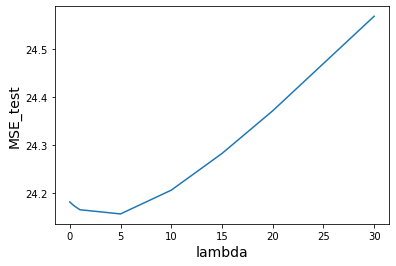

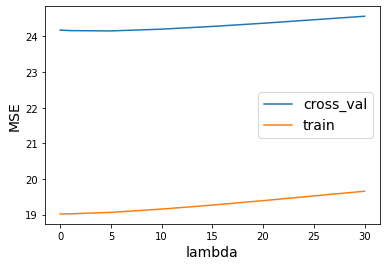

In [198]:
#regularization            (Ridge)


err_train = []
err_test = []
lambdas=[0,0.02,0.04,0.06,0.10,0.20,0.50,1,5,10,15,20,30]   
for j in lambdas:
      model = Ridge(alpha=j).fit(x7, y_train)    
      #print('*')  
      y_train_predictions = model.predict(x7)
      MSE_train = mean_squared_error(y_train, y_train_predictions)
      err_train.append(MSE_train)
      #testing error cv  
      MSE_test =  (-1*cross_val_score(model,x_train,y_train,scoring = 'neg_mean_squared_error', cv=5)).mean()
      err_test.append(MSE_test) 
print(err_test)
print(err_train)
plt.figure()        
plt.xlabel("lambda", fontsize=14)
plt.ylabel("MSE_test", fontsize=14)

plt.plot(lambdas,err_test)
plt.show()

plt.plot(lambdas, err_test, label="cross_val")
plt.plot(lambdas, err_train, label="train")
plt.xlabel("lambda", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.legend(fontsize=14)
plt.show()

